In [14]:
import sys
import os
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import i0,i1,iv
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import seaborn as sns

from metric_voting.elections import *
from metric_voting.measurements import *
from metric_voting.utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
colors = ["#0099cd","#ffca5d","#00cd99","#99cd00","#cd0099","#9900cd","#8dd3c7",
        "#bebada","#fb8072","#80b1d3","#fdb462","#b3de69","#fccde5","#bc80bd",
        "#ccebc5","#ffed6f","#ffffb3","#a6cee3","#1f78b4","#b2df8a","#33a02c",
        "#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#b15928",
        "#64ffda","#00B8D4","#A1887F","#76FF03","#DCE775","#B388FF","#FF80AB",
        "#D81B60","#26A69A","#FFEA00","#6200EA",
    ]

colors2 = colors = colors[:6] + colors[-12::2]

In [3]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "font.family": "serif",
    "font.serif": [],
    "text.usetex": True,
    "pgf.rcfonts": False,
    "font.size": 18
})

### Setting

In [37]:
candidate_positions = np.array([
    [-1,1],
    [0,1],
    [1,1],
    [-1,0],
    [0,0],
    [1,0],
    [-1,-1],
    [0,-1],
    [1,-1]
])

bloc_size = 10000
bloc1 = np.random.normal(loc = [0,1], scale = 1/6, size = (bloc_size,2))
bloc2 = np.random.normal(loc = [0,-1], scale = 1/6, size = (bloc_size,2))
voter_positions = np.vstack((bloc1, bloc2))

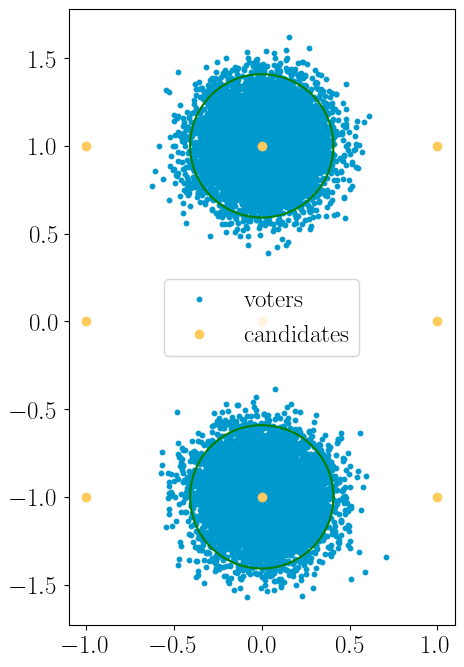

In [38]:
# visualize the results
fig,ax = plt.subplots(figsize = (6,8))
pal = sns.color_palette("hls", 8)

# confidence intervals:
bloc1_center = np.array([0,1])
bloc2_center = np.array([0,-1])
radius = np.sqrt(1/6)
theta = np.linspace(0, 2 * np.pi, 500)
bloc1_x = bloc1_center[0] + radius * np.cos(theta)
bloc1_y = bloc1_center[1] + radius * np.sin(theta)
bloc2_x = bloc2_center[0] + radius * np.cos(theta)
bloc2_y = bloc2_center[1] + radius * np.sin(theta)
ax.plot(bloc1_x, bloc1_y, color ='green')
ax.plot(bloc2_x, bloc2_y, color ='green')

ax.scatter(voter_positions[:,0], voter_positions[:,1], label = 'voters', color = colors[0], s = 10)
ax.scatter(candidate_positions[:,0], candidate_positions[:,1], label = 'candidates', color = colors[1])
plt.xticks()
plt.yticks()
plt.gca().set_aspect('equal', adjustable='box') 
plt.legend()

In [41]:
# Mean of rice distribution:
def laguerre(x):
    bessels = (1-x)*i0(-x/2) - x*i1(-x/2)
    return (np.e**(x/2))*bessels


nu = 1
sigma = 1/6
lv = laguerre(-(nu**2)/(2 * sigma**2))
sigma * np.sqrt(np.pi/2) * lv

1.0139897666846687

1.112720556901932

In [44]:
d1 = np.sqrt(np.pi/64)
d2 = 2.007
d3 = 1.014


In [46]:
(d1 + d2)/(2*d3)

1.0988938517569968

In [49]:
(4*d1 + 4*d2)/(8*d3)

1.0988938517569968

In [52]:
d3/d1

4.576705901739399